### Some terms you need to understand for understanding Large Language Models
  - *logits*
  - *softmax*
  - *cross entropy*
  - *one hot encoding*
  - *encoding/embedding*
  - *tokens, tokenizer*
  - **attention**
    - multi-head attention
  - positional encoding
    - rotary positional encoding
  - *transformer*
    - encoder
    - decoder
    - Feed Forward Layer
    - Residual Connection
    - *Layer Normalization*
  - optimizer
  - Important players in the AI Ecosystem
  - How to train/fine tune!

### So, what is *ATTENTION*?
  - It is an NN recipe that empirically works well <https://arxiv.org/abs/1706.03762>
  - For with NNs that have *Embeddings* (e.g. LLMs!)
  - *mechanism relating different positions of a single sequence in order to compute a representation of the sequence.*
    - Embedding is a tensor of shape `(nEmbed, nVocab)`
  - The input embedding vector `(nEmbed, n)` transforms a sequence of `SeqLen` tokens (i.e. integers) into a tensor of `(SeqLen, nEmbed)`
  - 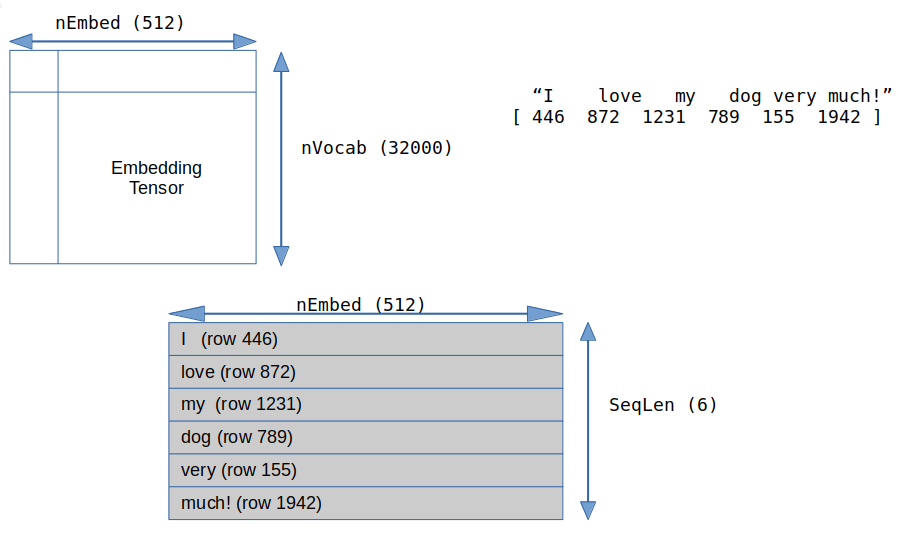
    

### Attention, continued
  - The input vector of shape `(SeqLen, nEmbed)` is replicated 3 times, and called $Q, K, V$ (query, key, value)
  - $Q @ K^T$ or `Q:(SeqLen, nEmbed) @ K.T (nEmbed, SeqLen) =  (SeqLen, SeqLen)`
  - 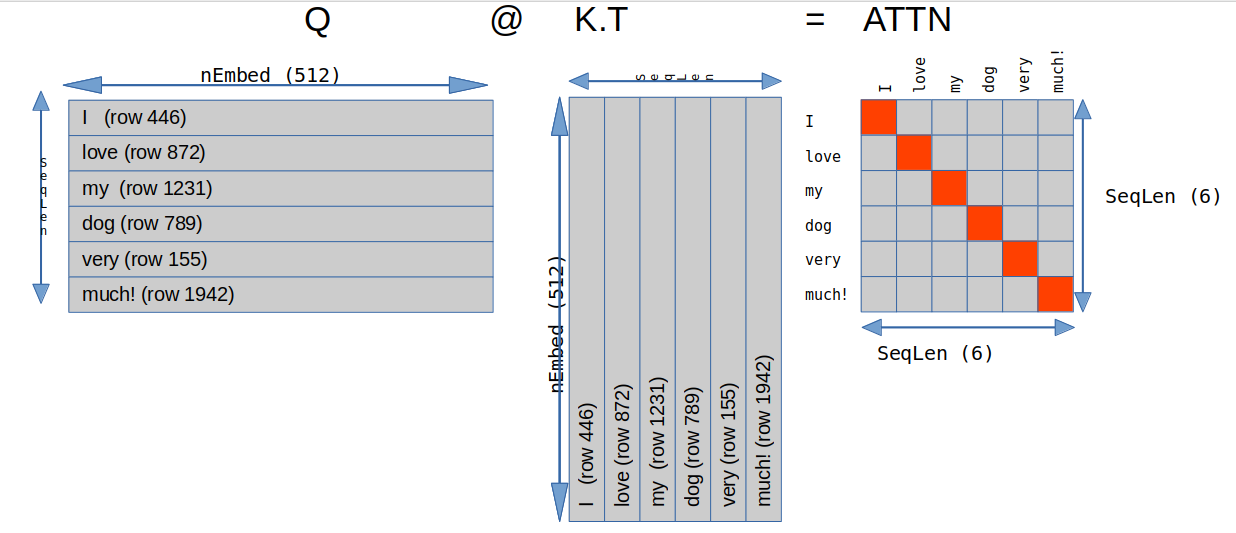


### Attention continued
  - $Q, K, V$ are tensors of shape `(SeqLen, nEmbed)` 
  - $Attention(Q,K,V) = Softmax(\frac{\displaystyle Q @ K^{T}}{\displaystyle \sqrt{d_k}}) @ V$
  - $d_k$ is `nEmbed` for single-head attention, or $\displaystyle \frac{nEmbed}{nHeads}$ for multi-head attention

### What is Multi-Head attention?
  - $Q, K, V$ are split (columwise) into `nHead` columnwise chunks
  - $head_i = Attention(\displaystyle  Q @ W^q_i, K @ W^k_i, V @ W^v_i)$
  - $Attention(Q,K,V) = Softmax(\displaystyle \frac{Q @ K^T}{\sqrt{d_k}}) @ V$
  - 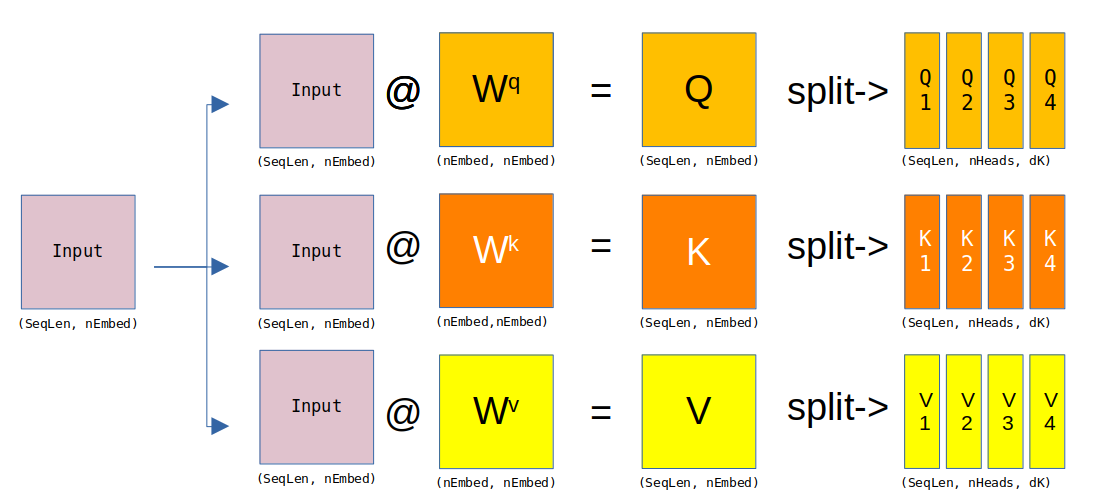
  - 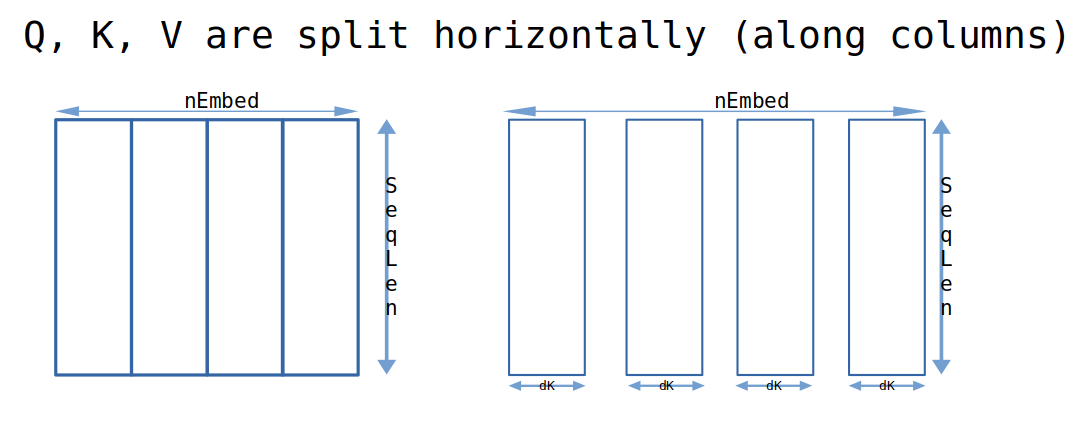

### What is **Masked** Attention?
  - 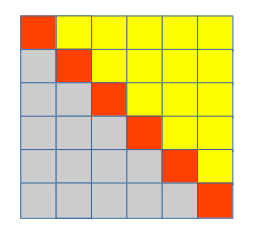
  - Areas in Yellow are set with $-\infty$ before softmax
  - Softmax then will replace these values with 0.0
  - Prevents **prior** tokens from interacting with **future** tokens

### The basic architecture **Warning! Attention, Transformer**
  - The original transformer architecture is called `encoder-decoder` architecture
  - It was used for language translation.
    - Input language was sent in to the encoder side
    - The output language was sent into the decoder side
    - The decoder side also incorporated the output of the encoder.
    - The decoder then "decodes" the encoder output and generates the final translate
  - After the final Softmax of the final attention layer, we have $ATTN (1,SeqLen) @ V (SeqLen, nEmbed) = prelogits (1, nEmbed)$
  - We then pass this `prelogits` into another `nn.Linear` layer (of shape $(nEmbed, nVocab)$ to get back a `logits` of shape $(1, nVocab)$
  - Then this logits `(1,nVocab)` is passed through a softmax once more to generate a probability vector.
  - This probability vector is then passed into `torch.multinomial()` to pick an output token
  - This output token is then appended to the input, and the whole process begins again!
  - 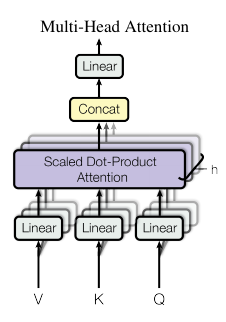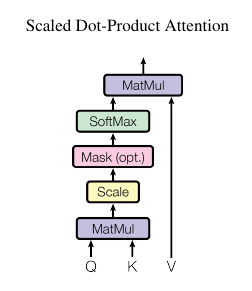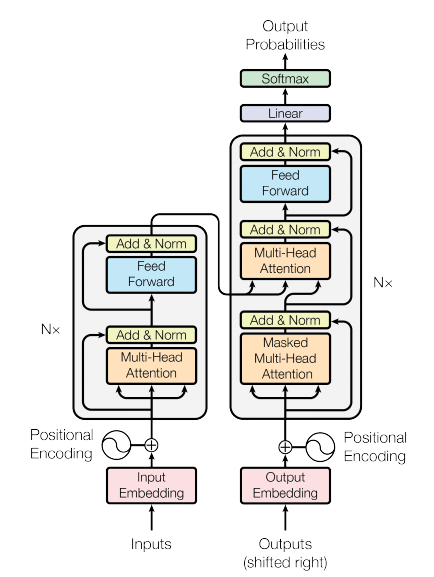

### Now each of the produced $Q_i, K_i, V_i$ sent into Attention
  - 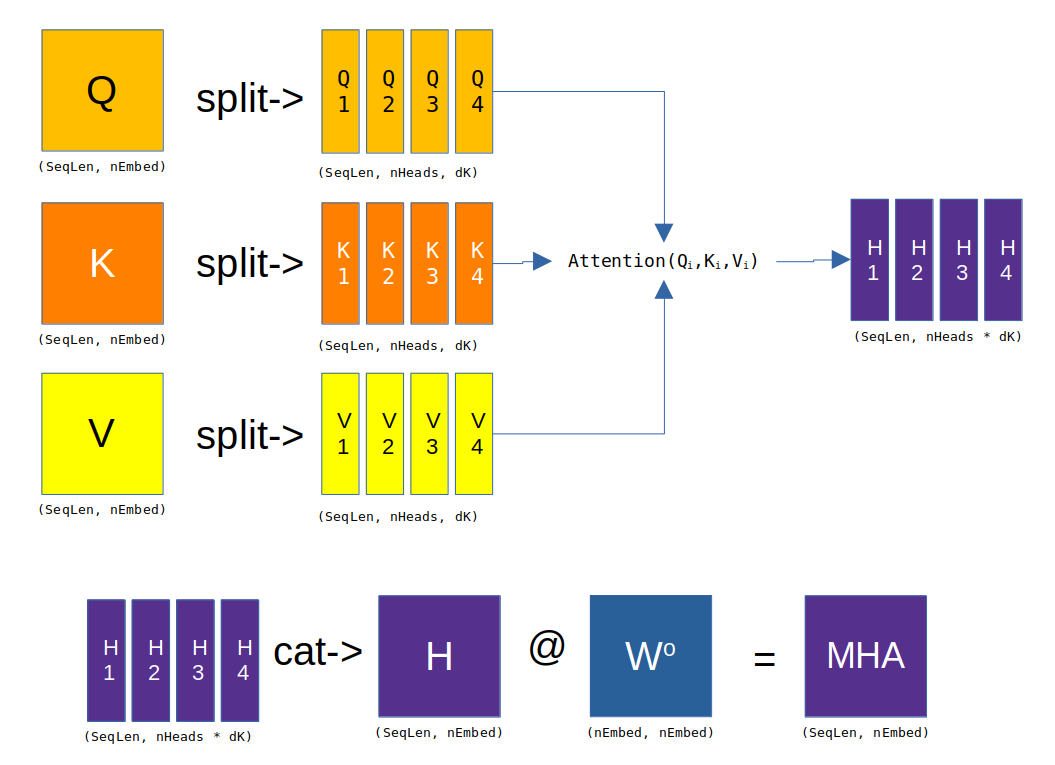

### So what are the parameters thus far?
  - 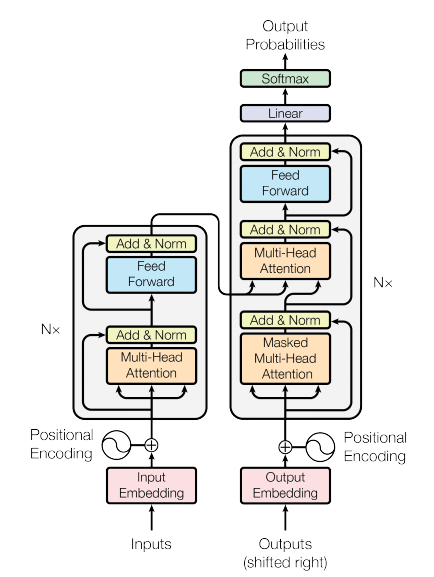
  - Each Masked Multi Head Attention unit contains
    - $W^q, W^k, W^v, W^o$, each are $(nEmbed, nEmbed)$
  - Residual Connection
    - Fancy way of saying $y = f(x) + x$
    - i.e. input "skips" some layers and is incorporated into the output directly.
  - Feed Forward layer
    - it's a Multi-Layer-Perceptron (fancy name for some number of matrix-multiply layers!)
    - principally, it has some number of `(nEmbed, hiddenDim)` with a fancy activation function.
      - e.g. <https://pytorch.org/docs/stable/generated/torch.nn.functional.silu.html>
        - <https://arxiv.org/abs/1710.05941v1>
        - <https://arxiv.org/abs/1702.03118>
        - <https://arxiv.org/abs/1606.08415>
    - Different variants of transformers have  slightly different feed forward layers
  - Reminder:
    - The final Linear layer is responsible for generating the logits $(1, nVocab)$
    - the logits are then passed into `softmax` to generate the probability matrix to be used with `torch.multinomial`

### What is *Layer Normalization*?
  - <https://pytorch.org/docs/stable/generated/torch.nn.LayerNorm.html>
    - Careful! complexities on n-dim tensors (if n > 2)
    - **batching and projection!!**
  - $ Norm(x_j) = \displaystyle \gamma \frac{x_j - \hat{\mu_j}}{\sqrt{\sigma_j^2 + \epsilon}} + \beta$
  - $\gamma$ and $\beta$ are **learnable parameters. (default 1.0, and 0.0)**
  - $\mu_j$ is the *mean value for $x_j$
  - $\sigma_j$ is the *variance (standard deviation)* for $x_j$
  - $\epsilon$ is a small value to make sure the denominator is not zero!

### KV-Caching (Llama specific!)